In [6]:
from datasets.aqsol import AQSOLSmiles

original_dataset = AQSOLSmiles('/data')

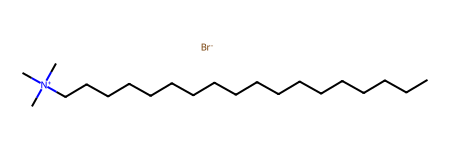

In [7]:
from rdkit.Chem import MolFromSmiles
MolFromSmiles(original_dataset.smiles[0])

In [17]:
from encoder import KPGTEncoder
from datasets.utils import prepare_molecular_dataset

dataset = prepare_molecular_dataset(original_dataset, encoder=KPGTEncoder(), read_only=True, representation_path='/data/representations')

Opening /data/representations/KPGT_base/values.h5py


In [28]:
from torch_mist import estimate_mi, k_fold_mi_estimate

mi_value, log = k_fold_mi_estimate(
    estimator='smile',
    hidden_dims=[256],
    data=dataset,
    device='cuda',
    verbose=True,
    seed=7
)

[Info]: max_epochs and max_iterations are not specified, using max_iterations=5000 by default.
Instantiating the smile estimator
[Warning]: Removing 101 entries from the dataset
Instantiating the estimator with {'hidden_dims': [256], 'x_dim': 2304, 'y_dim': 1}
SMILE(
  (ratio_estimator): JointCritic(
    (joint_net): DenseNN(
      (layers): ModuleList(
        (0): Linear(in_features=2305, out_features=256, bias=True)
        (1): Linear(in_features=256, out_features=1, bias=True)
      )
      (f): ReLU(inplace=True)
    )
  )
  (baseline): BatchLogMeanExp()
  (neg_samples): 1
)
Training the estimator
The dataset has 9982 entries.
Creating the 10 train/validation/test splits
Train size: 7984
Validation size: 998
Test size: 998



Fold:   0%|          | 0/10 [00:00<?, ?it/s]

[Warning]: Removing 77 entries from the dataset
[Warning]: Removing 13 entries from the dataset
[Warning]: Removing 11 entries from the dataset
[Warning]: Removing 101 entries from the dataset
[Info]: patience is not specified, using patience=1 (~2% of training epochs) by default.



Fold:  10%|█         | 1/10 [00:36<05:25, 36.20s/it, mutual_information: 0.31092256866395473 nats]

[Warning]: Removing 78 entries from the dataset
[Warning]: Removing 10 entries from the dataset
[Warning]: Removing 13 entries from the dataset
[Warning]: Removing 101 entries from the dataset


KeyboardInterrupt: 

In [25]:
log

,value,name,split,iteration,epoch
0,0.333420,mutual_information,train,620,620
1,0.283203,mutual_information,valid,620,620
2,0.281237,mutual_information,test,620,620
3,0.289117,mutual_information,all,620,620
4,0.235876,mutual_information,train,1054,1054
5,0.177343,mutual_information,valid,1054,1054
6,0.238337,mutual_information,test,1054,1054
7,0.242508,mutual_information,all,1054,1054
8,0.353908,mutual_information,train,1674,1674
9,0.312196,mutual_information,valid,1674,1674


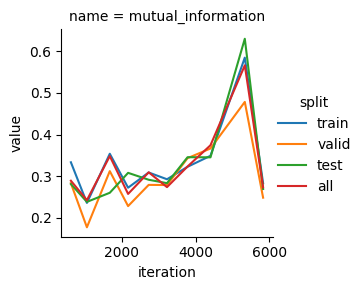

In [27]:
import seaborn as sns
grid = sns.FacetGrid(log, col='name', hue='split')
grid.map(sns.lineplot, 'iteration', 'value')
grid.add_legend()

In [16]:
import numpy as np
idx = []
for i, (x, y) in enumerate(dataset):
    print(i)
    if np.sum(x != x)>0:
        idx.append(i)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


KeyboardInterrupt: 

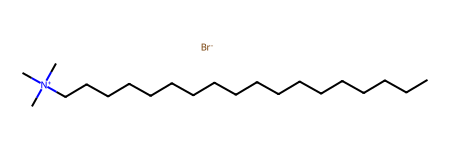